In [133]:
import pickle
import os
from sklearn import set_config
import pandas as pd
import numpy as np

### Model Pipeline

In [130]:
# import model and display pipeline
set_config(display='diagram')
model = pickle.load(open(os.path.join("models", "clf", "lr_mimic_test.pkl"), 'rb'))
model

Pipeline(steps=[('vect', CountVectorizer()), ('smote', SMOTE(random_state=42)),
                ('clf',
                 LogisticRegression(C=1, multi_class='multinomial',
                                    penalty='l1', random_state=42,
                                    solver='saga'))])

### Frequency table for MT Samples classes

In [131]:
df = pd.read_csv(os.path.join("data",
    "processed",
    "nlp",
    "mtsamples",
    "mtsamples_TC.csv"))
# frequency of the labels
print(df['medical_specialty'].value_counts())
# number of rows
len(df)

 Surgery                          1021
 Orthopedic                        303
 Cardiovascular / Pulmonary        280
 Radiology                         251
 Consult - History and Phy.        234
 Gastroenterology                  195
 Neurology                         168
 General Medicine                  146
 SOAP / Chart / Progress Notes     142
 Urology                           140
 Obstetrics / Gynecology           130
Name: medical_specialty, dtype: int64


3010

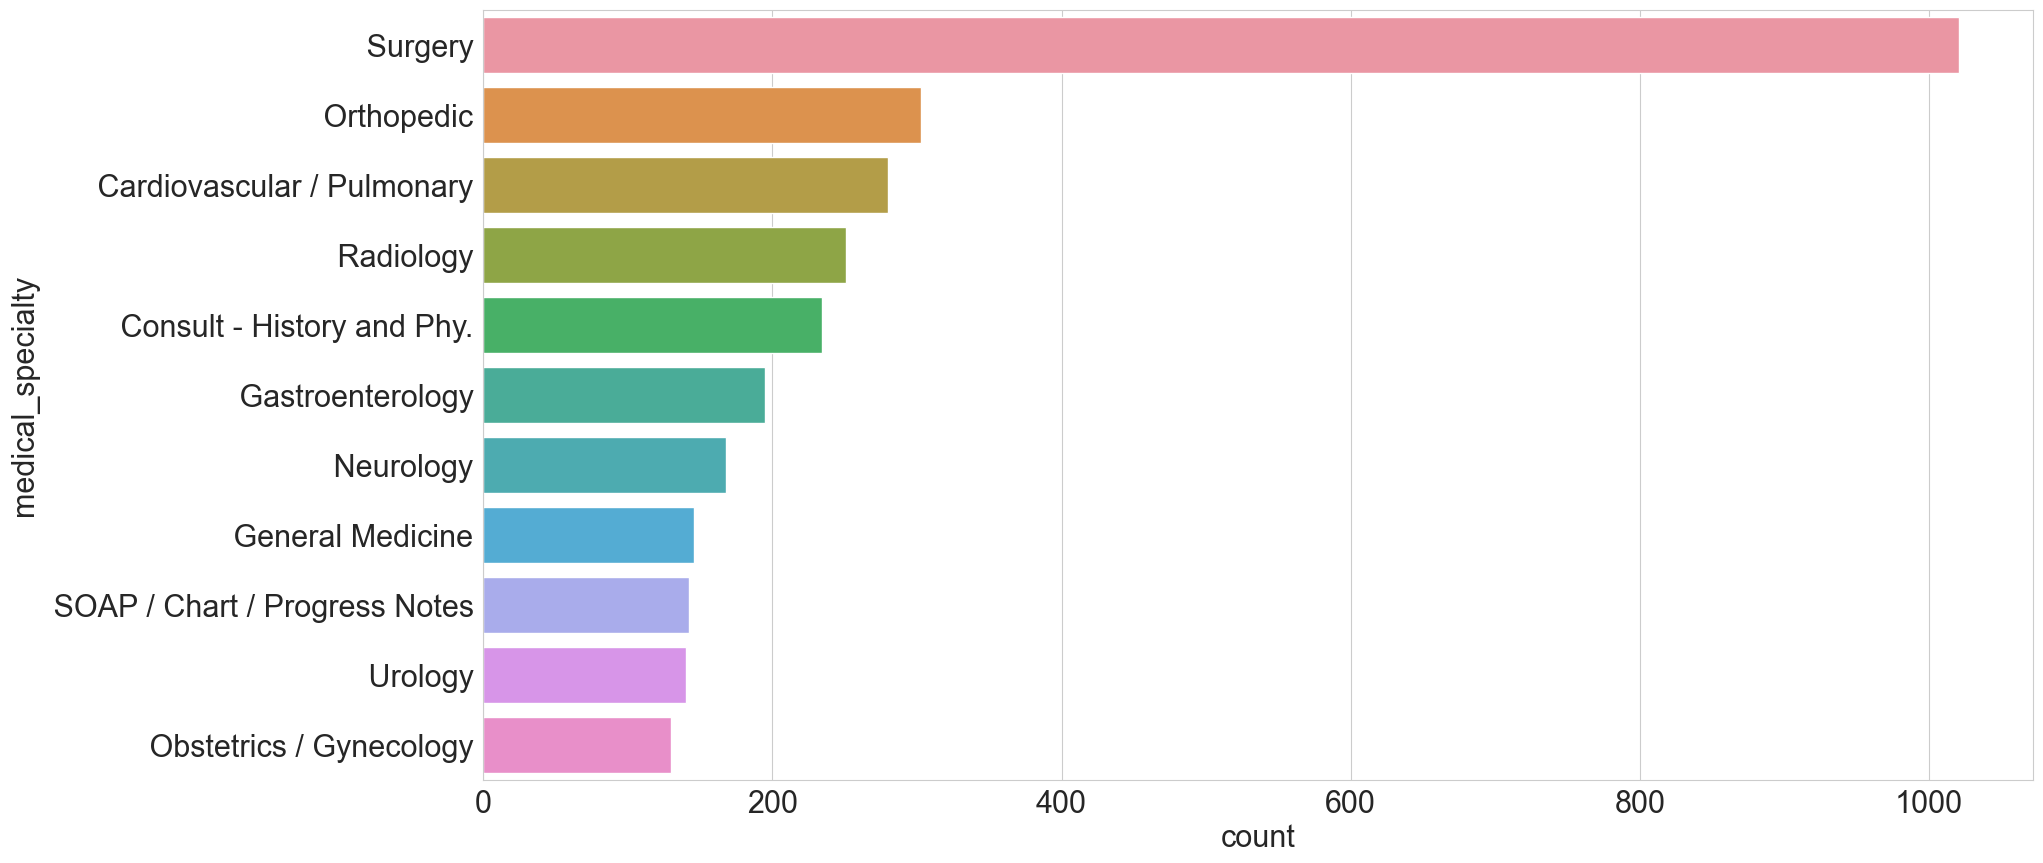

In [132]:
# plot the frequency of the labels with medical speciality 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.countplot(y="medical_specialty", data=df, order=df['medical_specialty'].value_counts().index)
plt.rcParams.update({'font.size': 22})
plt.show()

### Model Performance

In [204]:
test_df = pd.read_csv(os.path.join("data", "processed", "clf", "test.csv"))
test_df.specialty.value_counts()

Cardiothoracic & Vascular       2550
Emergency Department            1196
Gastroenterology                 796
Pulmonology                      745
Infectious Disease Specialty     736
Oncology                         581
Endocrinology                    259
Urology                          183
Neurology                        139
Internal Medicine Department     122
Orthopedic surgery               119
Psychiatry                        82
Primary Care                      39
Hematology                        38
Dermatology                       29
Obstetrics & Gynaecology          16
Name: specialty, dtype: int64

In [189]:
def load_data(filepath) -> tuple[pd.Series, pd.Series]:
    """
    Load data from csv file

    Parameters
    ----------
    filepath : str
        path to csv file

    Returns
    -------
    tuple[pd.Series, pd.Series]
        tuple with X and y
    """
    df = pd.read_csv(filepath)
    df = df.dropna()
    X = df.keywords
    y = df.specialty
    return X, y

In [190]:
X_test, y_test = load_data(os.path.join("data", "processed", "clf", "test.csv"))

In [191]:
# overall accuracy @3 of the model
k = 3
y_preb_probs = model.predict_proba(X_test)
top = np.argsort(y_preb_probs, axis=1)[:, -k:]
top = np.apply_along_axis(lambda x: model.classes_[x], 1, top)
actual = np.array(y_test).reshape(-1, 1)
np.any(top == actual, axis=1).mean()

0.8509773055227601

In [192]:
# make dataframe with top in a list and actual labels
df = pd.DataFrame(top)
df["actual"] = actual
# merge column 0, 1, 2
df["top"] = df[0].astype(str) + ", " + df[1].astype(str) + ", " + df[2].astype(str)
# drop columns 0, 1, 2
df = df.drop([0, 1, 2], axis=1)
print(df.shape)
df.head()

(7623, 2)


,actual,top
0,Gastroenterology,"Emergency Department, Cardiothoracic & Vascula..."
1,Cardiothoracic & Vascular,"Infectious Disease Specialty, Endocrinology, C..."
2,Emergency Department,"Internal Medicine Department, Orthopedic surge..."
3,Neurology,"Infectious Disease Specialty, Oncology, Neurology"
4,Endocrinology,"Cardiothoracic & Vascular, Emergency Departmen..."


In [193]:
# filter for Gastroenterology in actual
df_cardio = df[df["actual"] == "Cardiothoracic & Vascular"]
df_derma = df[df["actual"] == "Dermatology"]
df_ermegency = df[df["actual"] == "Emergency Department"]
df_endo = df[df["actual"] == "Endocrinology"]
df_gastro = df[df["actual"] == "Gastroenterology"]
df_hemat = df[df["actual"] == "Hematology"]
df_infect = df[df["actual"] == "Infectious Disease Specialty"]
df_internal = df[df["actual"] == "Internal Medicine Department"]
df_neuro = df[df["actual"] == "Neurology"]
df_obste = df[df["actual"] == "Obstetrics & Gynaecology"]
df_onco = df[df["actual"] == "Oncology"]
df_ortho = df[df["actual"] == "Orthopedic surgery"]
df_prime = df[df["actual"] == "Primary Care"]
df_psych = df[df["actual"] == "Psychiatry"]
df_pulmo = df[df["actual"] == "Pulmonology"]
df_urol = df[df["actual"] == "Urology"]

In [194]:
# percentage of how often  Gastrenterology is in the top column
accuracy_cardio = df_cardio["top"].str.contains("Cardiothoracic & Vascular").mean()
accuracy_derma = df_derma["top"].str.contains("Dermatology").mean()
accuracy_ermegency = df_ermegency["top"].str.contains("Emergency Department").mean()
accuracy_endo = df_endo["top"].str.contains("Endocrinology").mean()
accuracy_gastro = df_gastro["top"].str.contains("Gastroenterology").mean()
accuracy_hemat = df_hemat["top"].str.contains("Hematology").mean()
accuracy_infect = df_infect["top"].str.contains("Infectious Disease Specialty").mean()
accuracy_internal = df_internal["top"].str.contains("Internal Medicine Department").mean()
accuracy_neuro = df_neuro["top"].str.contains("Neurology").mean()
accuracy_obste = df_obste["top"].str.contains("Obstetrics & Gynaecology").mean()
accuracy_onco = df_onco["top"].str.contains("Oncology").mean()
accuracy_ortho = df_ortho["top"].str.contains("Orthopedic surgery").mean()
accuracy_prime = df_prime["top"].str.contains("Primary Care").mean()
accuracy_psych = df_psych["top"].str.contains("Psychiatry").mean()
accuracy_pulmo = df_pulmo["top"].str.contains("Pulmonology").mean()
accuracy_urol = df_urol["top"].str.contains("Urology").mean()

In [202]:
# create dataframe with the accuracy of each specialty
df = pd.DataFrame({"specialty": ["Cardiothoracic & Vascular", "Dermatology", "Emergency Department", "Endocrinology", "Gastroenterology", "Hematology", "Infectious Disease Specialty", "Internal Medicine Department", "Neurology", "Obstetrics & Gynaecology", "Oncology", "Orthopedic surgery", "Primary Care", "Psychiatry", "Pulmonology", "Urology"], "accuracy": [accuracy_cardio, accuracy_derma, accuracy_ermegency, accuracy_endo, accuracy_gastro, accuracy_hemat, accuracy_infect, accuracy_internal, accuracy_neuro, accuracy_obste, accuracy_onco, accuracy_ortho, accuracy_prime, accuracy_psych, accuracy_pulmo, accuracy_urol]})
df = df.sort_values(by="accuracy", ascending=False)
df

,specialty,accuracy
0,Cardiothoracic & Vascular,0.939929
2,Emergency Department,0.912134
4,Gastroenterology,0.871859
6,Infectious Disease Specialty,0.841033
14,Pulmonology,0.840268
10,Oncology,0.830743
9,Obstetrics & Gynaecology,0.687500
13,Psychiatry,0.679012
3,Endocrinology,0.640927
11,Orthopedic surgery,0.621849


### Feature Importance and Coefficients Plots

Feature importance for Decision Tree, Random Forest and XGBoost
- how many features did the model use?
- plot with 20 most important features for model

In [115]:
model = pickle.load(open(os.path.join("models", "clf", "xgb_mimic_classified.pkl"), 'rb'))

In [116]:
feat_importance = model.named_steps["clf"].feature_importances_
vectorizer = model.named_steps["vect"]
feat = vectorizer.get_feature_names_out()

# only show features with importance > 0
feat_df = pd.DataFrame(
    {"feature": feat, "importance": feat_importance}
).sort_values(by="importance", ascending=False)
print(f"Number of features in general: {len(feat_df)}")
feat_df = feat_df[feat_df["importance"] > 0]
# print number of features with importance > 0
print(f"Number of features with importance > 0: {len(feat_df)}")

Number of features in general: 20749
Number of features with importance > 0: 3920


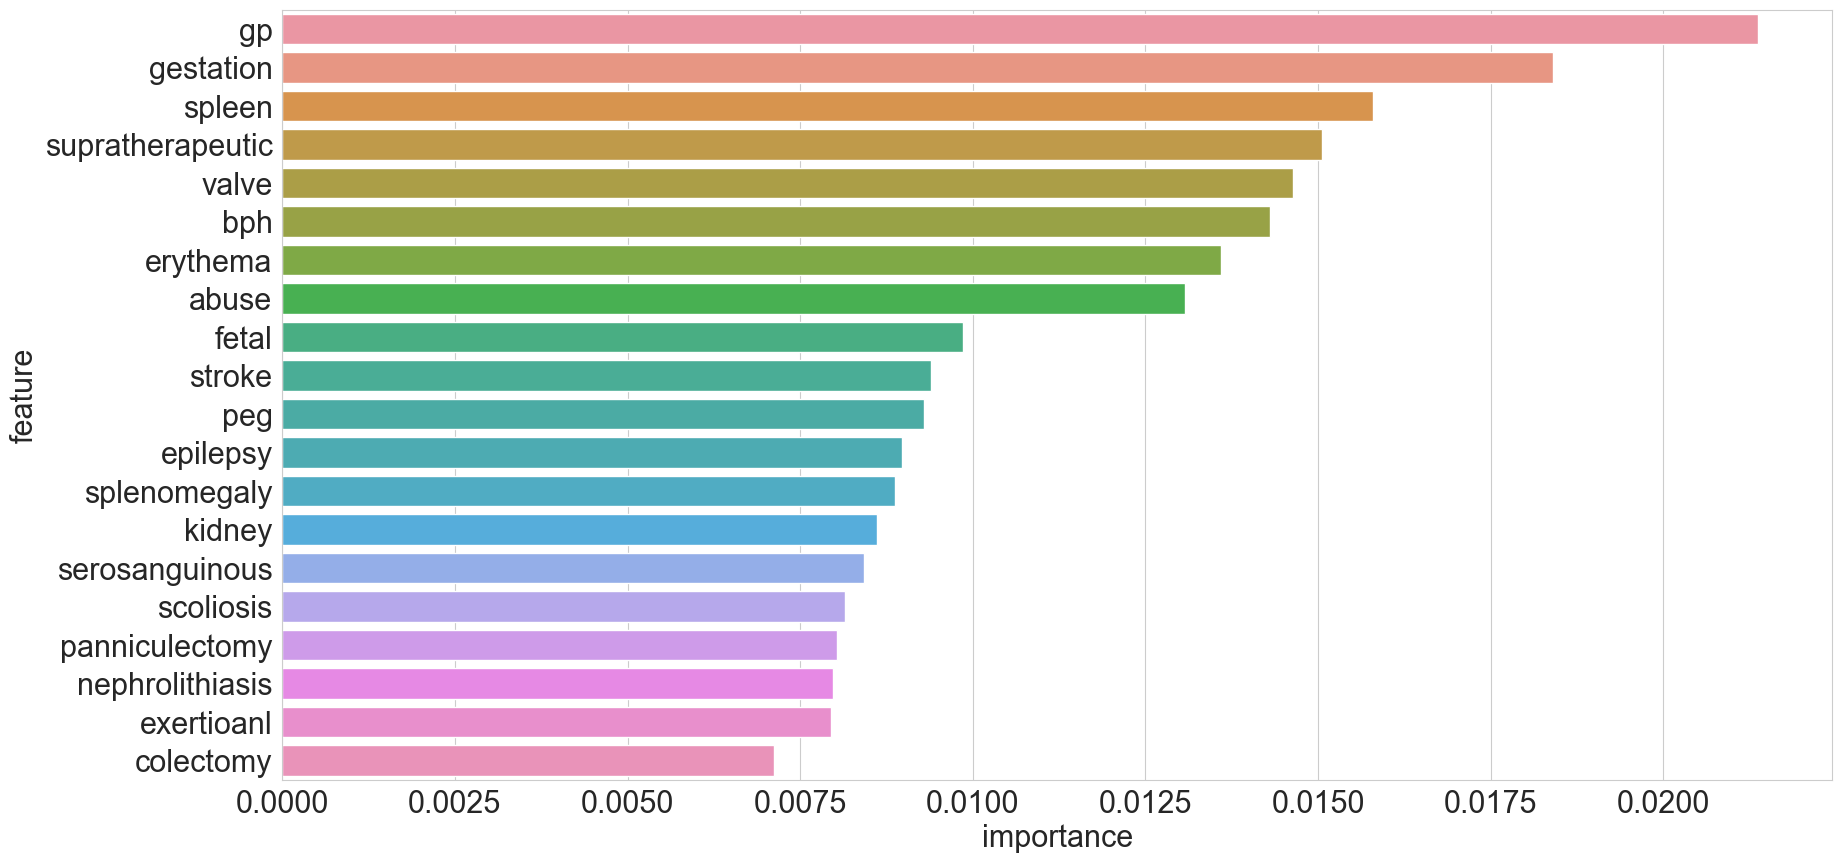

In [117]:
# plot the feature importance and only show the top 20 features
plt.figure(figsize=(20,10))
sns.barplot(x="importance", y="feature", data=feat_df.head(20))
plt.rcParams.update({'font.size': 22})
plt.show()

For Logistic Regression Model
- how many features did the model use per class?
- plot the most important words per class

In [105]:
model = pickle.load(open(os.path.join("models", "clf", "lr_mimic_test.pkl"), 'rb'))

In [109]:
# how many coefficients per class are non-zero
# unsicher, ob man nur positive oder auch negative betrachten soll
for i, coef in enumerate(model.named_steps["clf"].coef_):
    print(f"Number of features non-zero for class {model.classes_[i]}: {np.count_nonzero(coef)}")

Number of features non-zero for class Cardiothoracic & Vascular: 2218
Number of features non-zero for class Dermatology: 471
Number of features non-zero for class Emergency Department: 2097
Number of features non-zero for class Endocrinology: 888
Number of features non-zero for class Gastroenterology: 1426
Number of features non-zero for class Hematology: 587
Number of features non-zero for class Infectious Disease Specialty: 1924
Number of features non-zero for class Internal Medicine Department: 963
Number of features non-zero for class Neurology: 937
Number of features non-zero for class Obstetrics & Gynaecology: 265
Number of features non-zero for class Oncology: 1272
Number of features non-zero for class Orthopedic surgery: 621
Number of features non-zero for class Primary Care: 377
Number of features non-zero for class Psychiatry: 437
Number of features non-zero for class Pulmonology: 1627
Number of features non-zero for class Urology: 993


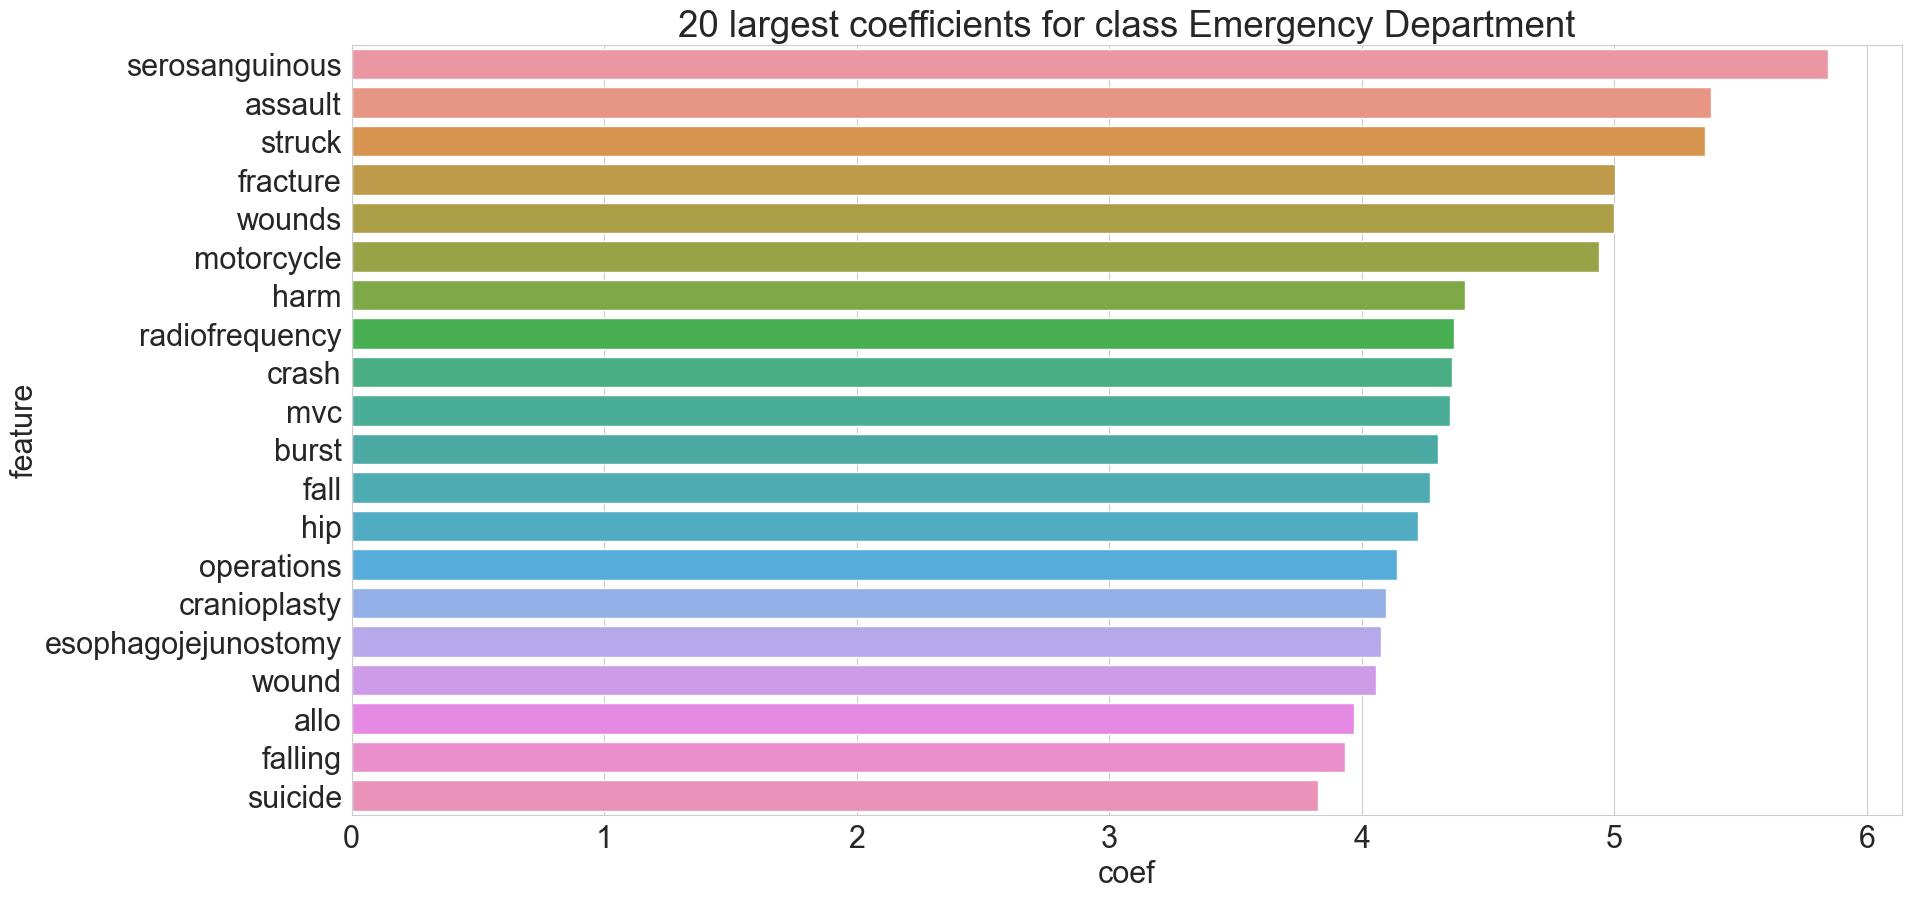

In [241]:
# plot the 20 largest coefficients for first class

# get the coefficients
coef = model.named_steps["clf"].coef_[2]
# get the feature names
vectorizer = model.named_steps["vect"]
feat = vectorizer.get_feature_names_out()

# create a dataframe with the coefficients and the feature names
coef_df = pd.DataFrame({"feature": feat, "coef": coef})

# sort the dataframe by the coefficients
coef_df = coef_df.sort_values(by="coef", ascending=False)
# plot the 20 largest coefficients
plt.figure(figsize=(20,10))
sns.barplot(x="coef", y="feature", data=coef_df.head(20))
plt.rcParams.update({'font.size': 22})
plt.title("20 largest coefficients for class " + model.classes_[2])
plt.show()

### Lime output 

In [250]:
model = pickle.load(open(os.path.join("models", "clf", "xgb_mimic_classified.pkl"), 'rb'))

In [251]:
from lime.lime_text import LimeTextExplainer

In [255]:
explainer = LimeTextExplainer(class_names=model.classes_)
exp = explainer.explain_instance("mass fatigue cough", model.predict_proba, num_features=5, top_labels=2)
exp.show_in_notebook(text=True)